### Question 2

### What is given:

In [49]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
df = pd.read_csv("data/noisypopulation.csv")
df.head()

,f,x,y
0,0.047790,0.00,0.011307
1,0.051199,0.01,0.010000
2,0.054799,0.02,0.007237
3,0.058596,0.03,0.000056
4,0.062597,0.04,0.010000


In [51]:
df.shape

(200, 3)

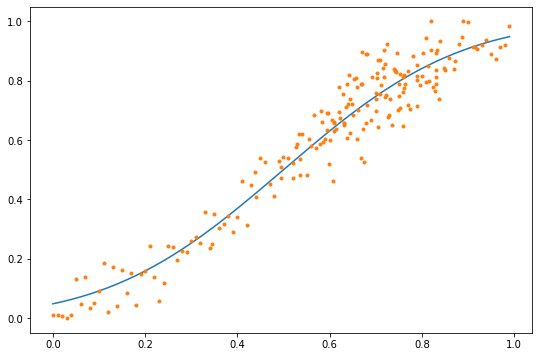

In [52]:
plt.figure(figsize=(9,6))
plt.plot(df.x, df.f)
plt.plot(df.x, df.y, '.')
plt.show()

### Solution Starts here:  (help taken from linear regression lecture notebooks provided by Rahul)

#### Fitting a reg. line for the given data using sklearn

In [53]:
xgrid = np.linspace(0,1,1000)
Xgrid = xgrid.reshape(-1,1)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
X = df.x.values.reshape(-1,1) # reshape into list of lists format

In [56]:
X.shape, df.y.shape

((200, 1), (200,))

In [57]:
lr = LinearRegression()
lr.fit(X,df.y)
fgrid = lr.predict(Xgrid)

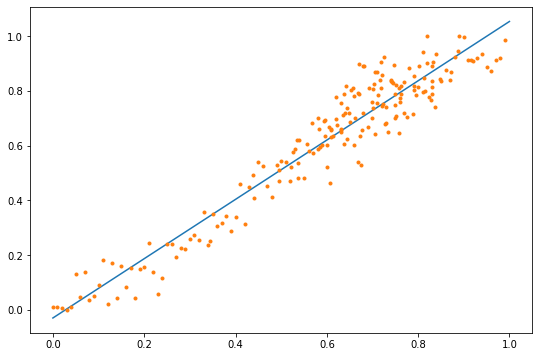

In [58]:
plt.figure(figsize=(9,6))
plt.plot(Xgrid, fgrid)
plt.plot(X, df.y, '.')
plt.show()

#### Bootstrapping to create more samples and plotting new reg. lines for each new boostrapped sample

<Figure size 648x432 with 0 Axes>

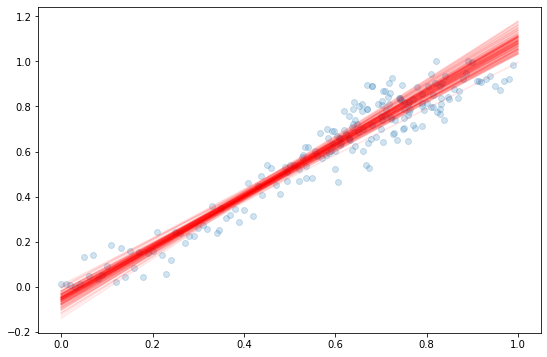

In [59]:
plt.figure(figsize = (9,6))

slopes = np.zeros(100)
intercepts = np.zeros(100)

for i in range(100):
    sample_indices = np.random.choice(range(100), size=40)
    Xsample = X[sample_indices]
    ysample = df.y[sample_indices]
    lr = LinearRegression().fit(Xsample, ysample)
    slopes[i] = lr.coef_
    intercepts[i] = lr.intercept_

fpredicts = intercepts + slopes*Xgrid

plt.figure(figsize=(9,6))
plt.plot(X, df.y, 'o', alpha=0.2)
for line in range(100):
    vals = fpredicts[:,line]
    plt.plot(Xgrid, vals, color="r", alpha=0.1)


#### Randomly chosing 20 lines and generating samples from those lines

In [60]:
sample_indices1 = np.random.choice(range(100), size=20)
sample_indices1

array([14, 20, 38,  0,  0, 52,  8, 59,  2, 14, 52, 61, 52, 25, 51, 53, 36,
       81, 69, 51])

In [61]:
sample_slopes = slopes[sample_indices1]
sample_intercepts = intercepts[sample_indices1]

fpredicts1 = sample_intercepts + sample_slopes*Xgrid

### Marking below figure as figure 1 for future comparison purpose

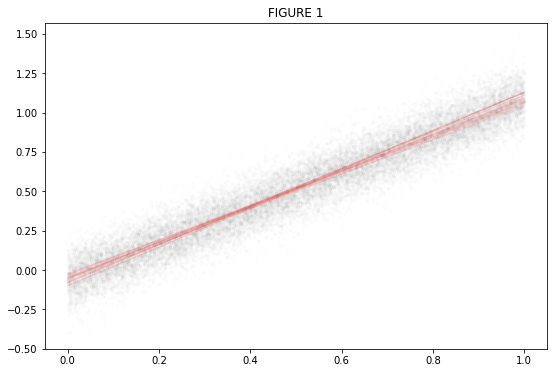

In [62]:
# For now I have randomly chosen standard deviation as 0.1, intuitively given the spread of the data
from scipy.stats import norm

plt.figure(figsize=(9,6))

for line in range(20):
    vals1 = fpredicts1[:,line]
    vals1
    gaussvals1 = norm(vals1, 0.1).rvs()
    plt.plot(Xgrid, vals1, color="r", alpha=0.05)
    plt.plot(Xgrid, gaussvals1, '.', color="k", alpha=0.009)
    plt.title("FIGURE 1")

### Now repeating same steps with a sample size of 5 instead of 40; the question asked us to do it for 20, but I am doing it for 5 to clearly accentuate the difference. With 20, the difference is slightly harder to assess visually.

<Figure size 648x432 with 0 Axes>

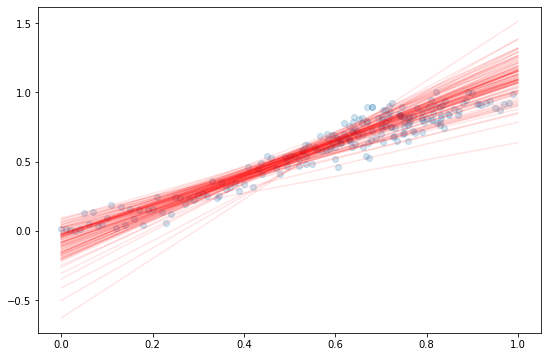

In [63]:
plt.figure(figsize = (9,6))

slopes2 = np.zeros(100)
intercepts2 = np.zeros(100)

for i in range(100):
    ######## I am using 5 instead of 20 to clearly show the difference in plots, one can change size from 5 to 20 easily if needed
    sample_indices2 = np.random.choice(range(100), size=5)
    Xsample2 = X[sample_indices2]
    ysample2 = df.y[sample_indices2]
    lr2 = LinearRegression().fit(Xsample2, ysample2)
    slopes2[i] = lr2.coef_
    intercepts2[i] = lr2.intercept_

fpredicts2 = intercepts2 + slopes2*Xgrid

plt.figure(figsize=(9,6))
plt.plot(X, df.y, 'o', alpha=0.2)
for line in range(100):
    vals2 = fpredicts2[:,line]
    plt.plot(Xgrid, vals2, color="r", alpha=0.1)

In [64]:
# Randomly chosing 20 lines
sample_indices3 = np.random.choice(range(100), size=20)
sample_indices3

array([87, 13, 82, 80, 69, 99, 63, 47,  5, 26, 27, 90, 90,  7, 44, 67, 20,
       92, 54, 50])

In [65]:
sample_slopes3 = slopes2[sample_indices3]
sample_intercepts3 = intercepts2[sample_indices3]

fpredicts3 = sample_intercepts3 + sample_slopes3*Xgrid

### Marking below figure as figure 2 for future comparison purpose


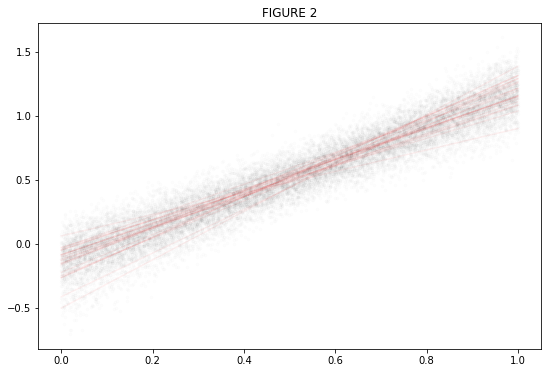

In [66]:
# For now I have randomly chosen standard deviation as 0.1, intuitively given the spread of the data
from scipy.stats import norm

plt.figure(figsize=(9,6))

for line in range(20):
    vals3 = fpredicts3[:,line]
    gaussvals3 = norm(vals3, 0.1).rvs()
    plt.plot(Xgrid, vals3, color="r", alpha=0.05)
    plt.plot(Xgrid, gaussvals3, '.', color="k", alpha=0.009)
    plt.title("FIGURE 2")

### Comparing figure 1 and figure 2..... figure 2 is more spread out... this shows that if we sample less number of points, we get a wider distribution of possible values, which is not a good thing as then we are not able to predict accurately. So ideally, we should take as large a sample as practically possible